In [1]:
#import the necessary libraries
import pandas as pd 
import numpy as np 
import tensorflow as tf  
import matplotlib.pyplot as plt 

In [ ]:
#additional libraries for nueral network
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#preparing of data
dataset = pd.read_csv('spam.csv',encoding='latin-1')

In [ ]:
dataset = dataset.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [ ]:
dataset = dataset.rename(columns={"v1":'label', "v2":'text'})

In [ ]:
#display the data
tags = dataset["label"]
texts = dataset["text"]

In [ ]:
#classifying the label (0 or 1)
dataset['label'].unique()
label = {'spam': 1,'ham': 0}
dataset['label'].replace(label, inplace=True)

In [ ]:
#preparating of data to train
training_size = int(len(texts) * 0.8)

In [ ]:
#training of text data
training_texts = texts[0:training_size]
testing_texts = texts[training_size:]

In [ ]:
#training of tags data
training_tags = tags[0:training_size]
testing_tags = tags[training_size:]

In [ ]:
#convert labels to numpy 
training_tags_final = np.array(training_tags)
testing_tags_final = np.array(testing_tags)

In [ ]:
#Tokenize Dataset 
vocab_size = 1000
embedding_dim = 16
max_length = 100

In [ ]:
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_texts)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

In [ ]:
testing_sequences = tokenizer.texts_to_sequences(testing_texts)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [ ]:
#model the data
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#display the table of model data
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           16000     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 6)                 9606      
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#utlizing the epoch function 
num_epochs = 35
history=model.fit(padded, training_tags_final, epochs=num_epochs, validation_data=(testing_padded, testing_tags_final))

Epoch 1/35
140/140 [==============================] - 1s 4ms/step - loss: 0.3275 - accuracy: 0.8620 - val_loss: 0.1788 - val_accuracy: 0.8691
Epoch 2/35
140/140 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9336 - val_loss: 0.1390 - val_accuracy: 0.9731
Epoch 3/35
140/140 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9771 - val_loss: 0.1242 - val_accuracy: 0.9794
Epoch 4/35
140/140 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9843 - val_loss: 0.1143 - val_accuracy: 0.9839
Epoch 5/35
140/140 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9883 - val_loss: 0.0561 - val_accuracy: 0.9839
Epoch 6/35
140/140 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9928 - val_loss: 0.0495 - val_accuracy: 0.9839
Epoch 7/35
140/140 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9946 - val_loss: 0.0492 - val_accuracy: 0.9848
Epoch 

In [ ]:
# list all data history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


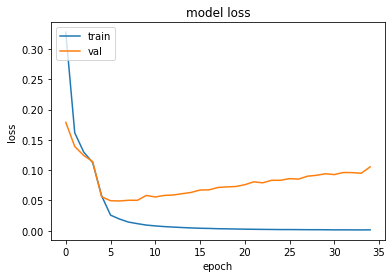

In [ ]:
#recalling the history 
#determining the accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [ ]:
#display the line graph
plt.show()

In [ ]:
#displaying the data 
dataset = pd.read_csv('output_spam.csv',encoding='latin-1')
dataset = dataset.rename(columns={"ï»¿":'labels', "text":'texts'})
dataset.head()

,labels,texts
0,1,Feel Yourself That You Are Always Happy.. Slow...
1,2,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2,3,Send me yetty's number pls.
3,4,Hey so this sat are we going for the intro pil...
4,5,I got it before the new year cos yetunde said ...


In [ ]:
#displaying messages
messages = dataset['texts'].astype(str)
print(messages)

#making of sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(messages)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

classes = model.predict(fakes_padded)

0     Feel Yourself That You Are Always Happy.. Slow...
1     staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2                           Send me yetty's number pls.
3     Hey so this sat are we going for the intro pil...
4     I got it before the new year cos yetunde said ...
5     Hey we can go jazz power yoga hip hop kb and y...
6     Hey mate. Spoke to the mag people. Weâ°ÃÃ·re...
7                                Morning only i can ok.
8                                  Wat time Ã_ finish?
9                 Shant disturb u anymore... Jia you...
10    4mths half price Orange line rental & latest c...
11    Your opinion about me? 1. Over 2. Jada 3. Kusr...
12    MOON has come to color your dreams, STARS to m...
13    You are a winner U have been specially selecte...
14    Unless it's a situation where YOU GO GURL woul...
15    Awww dat is sweet! We can think of something t...
16                              Bring tat cd don forget
17    Single line with a big meaning::::: \Miss 

In [ ]:
#classification of spam messages
for x in range(len(messages)):
  print(messages[x])
  print(classes[x])
  print('\n')

Feel Yourself That You Are Always Happy.. Slowly It Becomes Your Habit &amp; Finally It Becomes Part Of Your Life.. Follow It.. Happy Morning &amp; Have A Happy Day:)
[5.7089487e-15]


staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
[0.00464285]


Send me yetty's number pls.
[2.9580526e-05]


Hey so this sat are we going for the intro pilates only? Or the kickboxing too? 
[1.6826153e-08]


I got it before the new year cos yetunde said she wanted to surprise you with it but when i didnt see money i returned it mid january before the  &lt;#&gt; day return period ended.
[2.5074144e-12]


Hey we can go jazz power yoga hip hop kb and yogasana 
[3.9406714e-07]


Hey mate. Spoke to the mag people. Weâ°ÃÃ·re on.  the is deliver by the end of the month. Deliver on the 24th sept. Talk later. 
[1.310847e-08]


Morning only i can ok.
[2.239215e-08]


Wat time Ã_ finish?
[4.3424057e-05]


Shant disturb u anymore... Jia you...
[9.764574e-05]


4mths half price Orange line rental & latest camera